In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import passenger

In [2]:
fastq_path = "input/outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2.fastq.gz"
blast_path = "passenger-blast/outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2.blast.tsv"
prefix = "9a"
query_length = 30
mut_freq_name = prefix+"_mut_freq"
chigy = passenger.CHIGY_LC
max_mutation_count = 10
max_n_count = 10
# 2 or 3 gap segments, which corresponds to 0 or 1 indels
allowable_gap_segment_counts = [2, 3]

In [3]:
passenger.test_summarize_alignment()
passenger.test_correct_alignment()
passenger.test_summarize_alignment()
passenger.test_compute_mutation_counts_by_base()

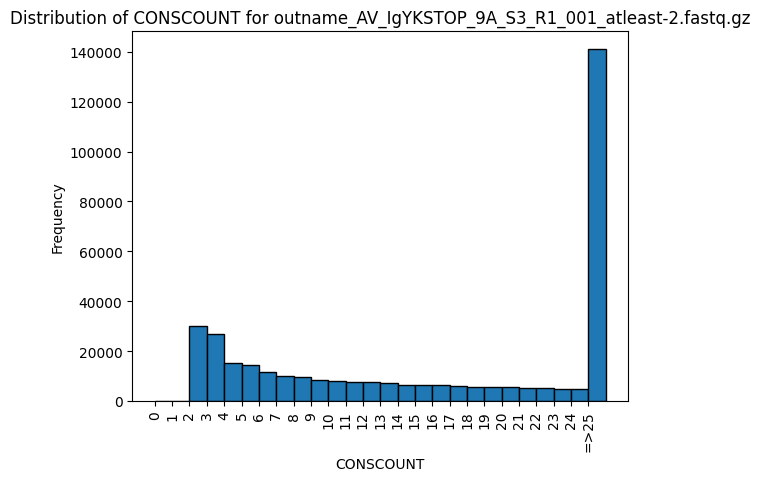

In [4]:
conscounts = passenger.umi_histogram(fastq_path, 25)


In [5]:
blast_df = passenger.blast_df_of_blast_files([blast_path], query_length)

processed_stop_df = chigy.processed_stop_df_of_blast_df(blast_df)
processed_stop_df

Before filtering by length: 74173
After filtering by length: 51643
Note: multiple hits found in BLAST results for passenger-blast/outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2.blast.tsv.
Original length: 51643
After dropping sequences with multiple hits: 51627



,subject,identity,length,mismatches,gap_openings,q_start,q_end,s_start,s_end,evalue,...,dataset,sequence,gap_segment_count,bookended_by_gaps,mutation_positions,mutation_bases,n_positions,mutation_count,n_count,Sequence number
0,CATAGGACTTGAAACCG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,30,0,0,1,30,47,76,1.820000e-09,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,GATCCTCTCTTCCAGCTCTCAGAGNCGCGCGCCTCCACCATGGAGT...,1,False,"[2, 3, 4, 6, 8, 9, 14, 15, 16, 17, 23, 25, 27,...","[T, C, C, C, C, T, C, A, G, C, G, G, C, G, G, ...","[26, 294, 296, 297, 298, 299, 300, 301, 302, 3...",145,20,0
1,CGGAACATATACGTGTA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,30,0,0,1,30,28,57,1.820000e-09,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,GAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTGTGG...,2,True,[172],[G],"[164, 213, 214, 215, 216, 217, 218, 219, 220, ...",1,16,1
2,AGAGGCAGAGATGAGAG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,30,0,0,1,30,52,81,1.820000e-09,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,GGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCAT...,4,False,"[1, 2, 4, 5, 6, 8, 9, 11, 12, 23, 25, 27, 28, ...","[G, A, G, C, A, C, C, C, T, G, G, C, G, G, C, ...","[275, 293, 295, 296, 297, 298, 302, 303, 304, ...",66,16,2
3,ACAAATAACGACGAAAG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,30,0,0,1,30,28,57,1.820000e-09,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,GAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTGTGG...,1,False,"[2, 14, 28, 30, 31, 32, 42, 43, 44, 45, 47, 48...","[G, G, G, G, C, C, T, G, G, A, T, C, A, C, T, ...","[254, 269, 271, 274, 296, 297, 299, 305, 306, ...",71,14,3
4,GGTATCCGATCCCAAAG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,30,0,0,1,30,52,81,1.820000e-09,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,GGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCAT...,2,False,"[1, 2, 4, 5, 6, 8, 9, 11, 12, 23, 25, 27, 28, ...","[G, A, G, C, A, C, C, C, T, G, G, C, G, G, C, ...","[290, 291, 292, 293, 294, 295, 296, 297, 298, ...",145,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51622,AGTCCCAAATTTAAAGG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,93.333,30,2,0,1,30,25,54,1.080000e-04,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,GGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTGTAATTG...,2,True,"[279, 309]","[A, G]",[],2,0,51622
51623,GGAACCATTCTAAAATA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,96.667,30,0,1,1,30,52,80,1.080000e-04,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,GGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCAT...,3,True,"[87, 90, 226, 234, 256, 273, 296]","[A, T, C, G, T, T, T]",[],7,0,51623
51624,AGACATATACGCGGGCT|PRCONS=Mus-p5-IgK|CONSCOUNT=...,93.333,30,0,1,1,30,71,98,7.000000e-03,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,GGCAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAG...,2,True,[43],[A],[],1,0,51624
51625,AAAATTCGTGATATGGA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,93.333,30,0,1,1,30,52,79,7.000000e-03,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,GGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCAT...,2,True,"[88, 146, 301]","[A, A, T]",[],3,0,51625


In [6]:
chigy.pretty_print_alignments(processed_stop_df.head())

> outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2 0
GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCT-ATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAAC
||...|.|..|  |....|||||.|....|..|.|..||.||....|..||||..|||| ||| ..||...|.|..||....|||..|..|.|....|..|...||.|||  |.||..||.|.|.|.|||...|.|........|...||.|| |||.||.|..|||| .||....||....||......||...|.|||   .|||||...||.....|.|..|  .||.|..|.|..|   .|||.||||   |..|.|.|..| ||.|..|.|..|| |||...||||...|.........|..|| .............
GATCCTCTCTT--CCAGCTCTCAGAGNCGCGCGCCTCCACCATGGAGTCACAGACTCAG-GTC-TGTGGTTGTCTGGTGTTGATGGAGACATTGTGATGACTCAGTCTCA--AAAATTCATGTCCACCTCAGTAGGAGACAGGGTCAGCGTCA-CCTGCAAGGCCAGT-CAGAATGTGGGTACTAATGTAGCCTGGTATC---AACAGAAACCAGGGCAATCTCC--TAAAGCACTGATT---TACTCGGCA---TCCTACAGGTA-CAGTGGAGCCCCTGATCGCTTCACAGGCNANNNNNNNA

In [7]:
# Group by 'dataset' and count the number of rows in each group
row_counts_by_dataset = processed_stop_df.groupby('dataset').size()

# Print the count of rows for each 'dataset'
print(row_counts_by_dataset)


dataset
outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2    51627
dtype: int64


In [8]:
processed_stop_df["mutation_count"].value_counts()[:20].sort_index()

mutation_count
0      1964
1      9360
2     13989
3      9275
4      5473
5      2974
6      1654
7       900
8       430
9       186
10      125
80      101
81      213
82      307
83      430
84      467
85      465
86      337
87      213
88      138
Name: count, dtype: int64

In [9]:
chigy_believable = processed_stop_df[(processed_stop_df["mutation_count"] < max_mutation_count) & (processed_stop_df["n_count"] < max_n_count) & (processed_stop_df["bookended_by_gaps"] == True)].copy()

chigy_believable


,subject,identity,length,mismatches,gap_openings,q_start,q_end,s_start,s_end,evalue,...,dataset,sequence,gap_segment_count,bookended_by_gaps,mutation_positions,mutation_bases,n_positions,mutation_count,n_count,Sequence number
10,AAACAAAACCATCATTA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,30,0,0,1,30,49,78,1.820000e-09,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,ATCATACTATATAACATCACAAATANACNANCNCCTCCANNATTNA...,2,True,"[117, 164, 200, 308]","[G, T, A, A]",[319],4,1,10
11,AACATAATTCAACCAAA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,30,0,0,1,30,51,80,1.820000e-09,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,TAAGAATACTCNANTACAGATCTAAGAGAAGCGNNCCNCAANAANG...,2,True,[],[],[],0,0,11
12,AATTTGGCAGCAGGATA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,30,0,0,1,30,45,74,1.820000e-09,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,GCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATGGAGTCA...,2,True,[],[],"[1, 205, 206, 207, 208, 295, 321]",0,7,12
14,GAAAGATAAGTAAAAAA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,30,0,0,1,30,68,97,1.820000e-09,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,ATCAGACATGAGCAAAACAANAATCANCTNTNCCATATCNAAGAGA...,2,True,[],[],[319],0,1,14
15,TCTCCACGAGGAAGGAT|PRCONS=Mus-p5-IgK|CONSCOUNT=...,100.000,30,0,0,1,30,28,57,1.820000e-09,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,GAGAGNCGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTGTGG...,2,True,"[270, 308, 315, 321]","[C, A, G, G]","[9, 303, 306, 307, 319]",4,5,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51622,AGTCCCAAATTTAAAGG|PRCONS=Mus-p5-IgK|CONSCOUNT=...,93.333,30,2,0,1,30,25,54,1.080000e-04,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,GGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTGTAATTG...,2,True,"[279, 309]","[A, G]",[],2,0,51622
51623,GGAACCATTCTAAAATA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,96.667,30,0,1,1,30,52,80,1.080000e-04,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,GGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCAT...,3,True,"[87, 90, 226, 234, 256, 273, 296]","[A, T, C, G, T, T, T]",[],7,0,51623
51624,AGACATATACGCGGGCT|PRCONS=Mus-p5-IgK|CONSCOUNT=...,93.333,30,0,1,1,30,71,98,7.000000e-03,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,GGCAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAG...,2,True,[43],[A],[],1,0,51624
51625,AAAATTCGTGATATGGA|PRCONS=Mus-p5-IgK|CONSCOUNT=...,93.333,30,0,1,1,30,52,79,7.000000e-03,...,outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2,GGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCAT...,2,True,"[88, 146, 301]","[A, A, T]",[],3,0,51625


In [10]:
# Find representatives of the various gap counts
representative_gap_counts = chigy_believable.drop_duplicates(subset=["gap_segment_count"])
representative_gap_counts = representative_gap_counts.sort_values(by=["gap_segment_count"])
chigy.pretty_print_alignments(representative_gap_counts)

> outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2 10
-------------------------------------------------------------------------------------GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAAC----------
                                                                                     |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.||||||||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.||||||||||.||          
ATCATACTATATAACATCACAAATANACNANCNCCTCCANNATTNAGTCACAGACTCAGGTCTGTGGTTGTCTGGTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCA

In [11]:
chigy_believable = chigy_believable[chigy_believable["gap_segment_count"].isin(allowable_gap_segment_counts)]
chigy_believable["mutation_count"].value_counts().sort_index()

mutation_count
0     1928
1     9251
2    13768
3     9061
4     5283
5     2845
6     1575
7      834
8      389
9      145
Name: count, dtype: int64

In [12]:
len(chigy_believable)

45079

In [13]:
# Find representatives of the various gap counts
representative_mutation_counts = chigy_believable.drop_duplicates(subset=["mutation_count"])
representative_mutation_counts = representative_mutation_counts.sort_values(by=["mutation_count"])
chigy.pretty_print_alignments(representative_mutation_counts)

> outname_AV_IgYKSTOP_9A_S3_R1_001_atleast-2 11
---------------------------------------------------------------------------------------GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAAC----------
                                                                                       ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||          
TAAGAATACTCNANTACAGATCTAAGAGAAGCGNNCCNCAANAANGGAGTCACAGACTCAGGTCTGTGGTTGTCTGGTGTTGATGGAGACATTGTGATGACTCAGTCTCAAA

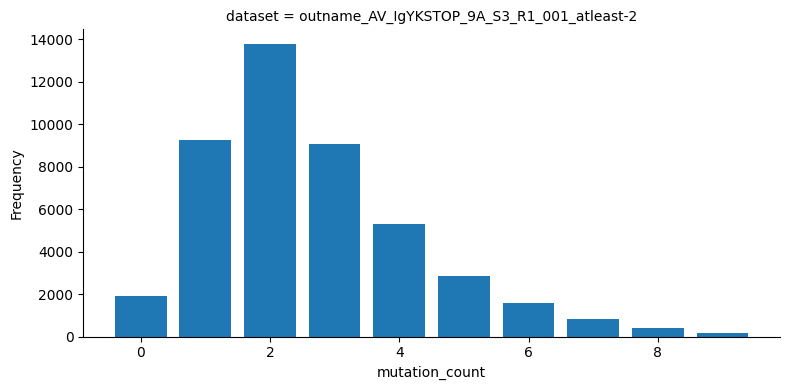

In [14]:
passenger.make_mutation_histogram(chigy_believable)

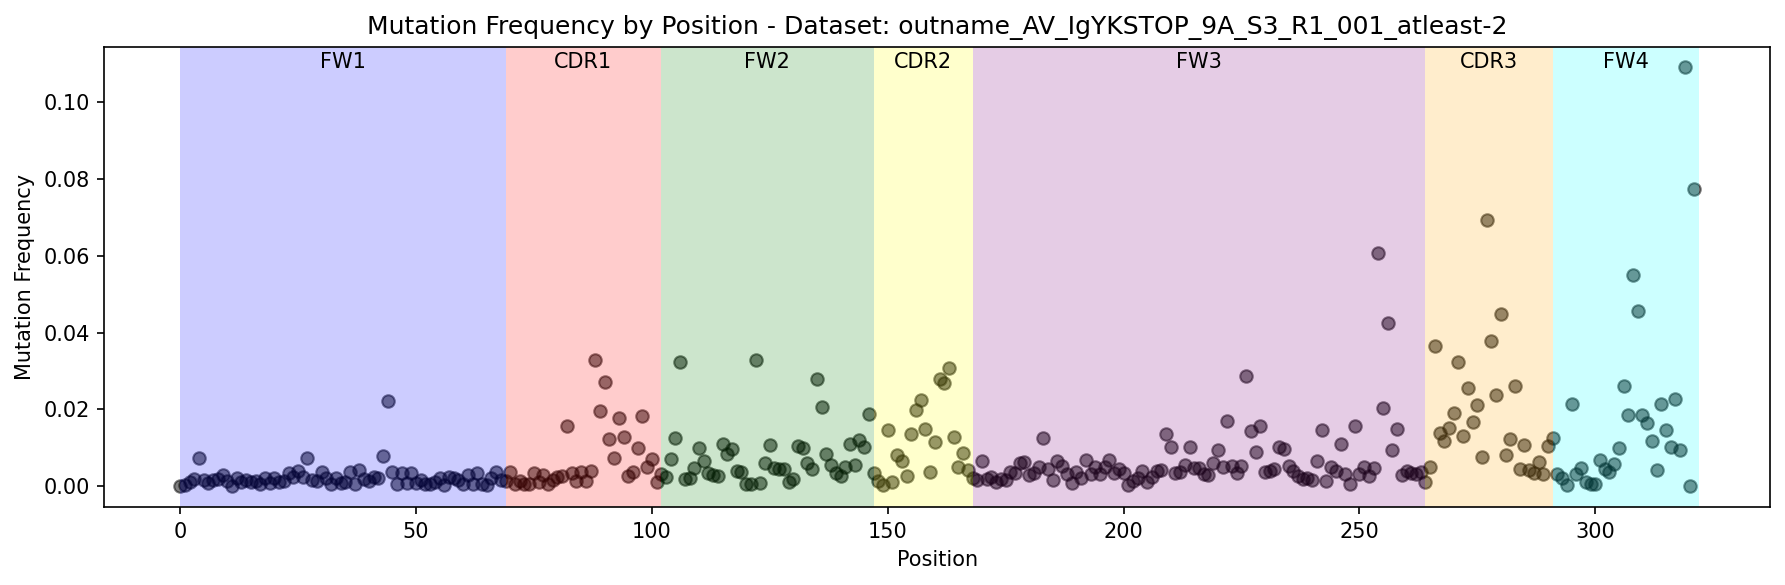

In [15]:
chigy.mutation_rate_plot_of_counts(chigy_believable)


In [16]:
counts_by_base = passenger.compute_mutation_counts_by_base(chigy_believable, chigy.chigy_stop_trimmed)

counts_by_base.to_csv("output/"+prefix+"_counts_by_base.csv")

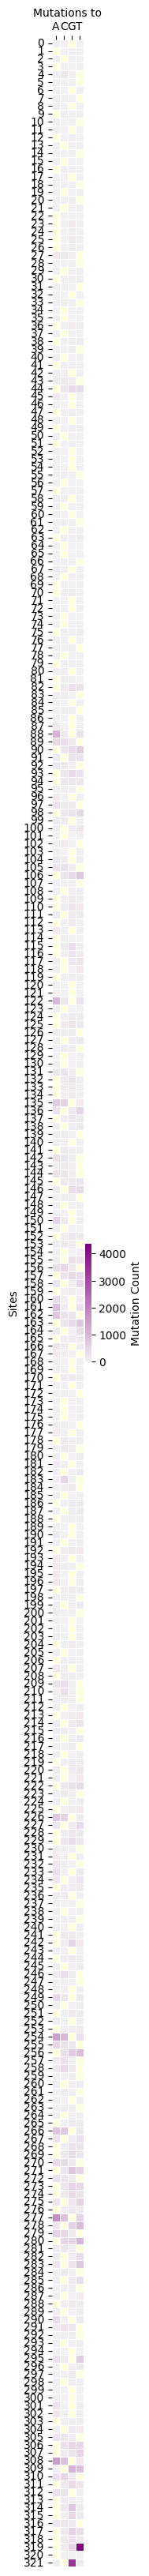

In [17]:
passenger.create_mutation_heatmap(counts_by_base)

In [18]:
counts_by_base.iloc[319]

A      -1
C      90
G     479
T    4349
Name: 319, dtype: int64

In [19]:
chigy_believable["sequence"].str[-20:].value_counts()


sequence
GAAATAAAACGGGCTGATGC    32666
GAAATAATACGGGCTGATGC     2797
GAAATAAAAGGGGCTGATGC     1899
GAAATAATAGGGGCTGATGC      663
GAGATAAAACGGGCTGATGC      556
                        ...  
GAAATCATANGGGCTGATGC        1
AAAATAATANGGGCTGATGC        1
GAGATAANANGGGCTGATGN        1
TAAATAANANGGGCTGATGN        1
CCTTCCTCAGGGGCTGATGC        1
Name: count, Length: 438, dtype: int64

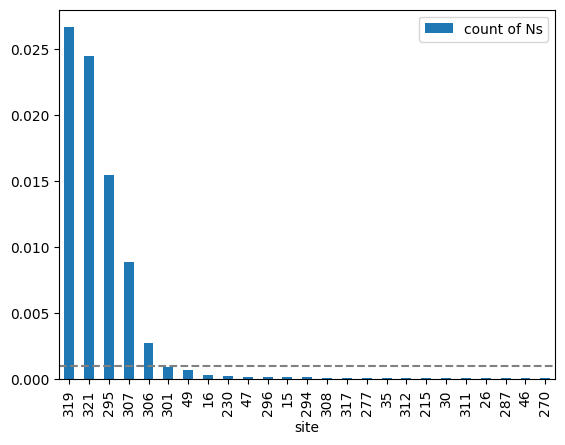

In [20]:
n_series = pd.DataFrame({"count of Ns": passenger.compute_thing_counts(chigy_believable, "n_positions")}).sort_values(by="count of Ns", ascending=False)
# set the index name of n_series to be "site"
n_series.index.name = "site"

n_frac = n_series / len(chigy_believable)
n_frac.iloc[:25].plot.bar()
# draw horizontal line at 0.001
plt.axhline(y=0.001, color='gray', linestyle='--')

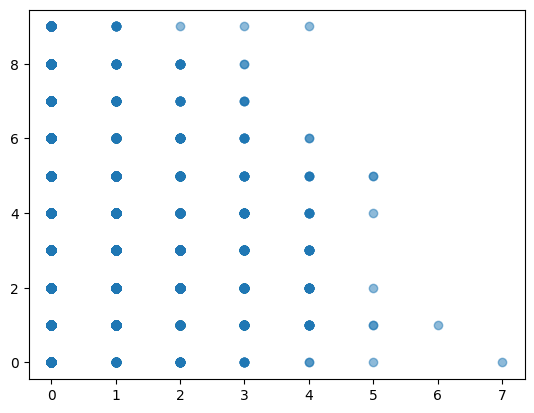

In [21]:
# make a scatter plot of chigy_believable["n_count"] versus chigy_believable["mutation_count"]
plt.scatter(chigy_believable["n_count"], chigy_believable["mutation_count"], alpha=0.5)

In [22]:
mutation_frequency_by_position = passenger.mutation_frequency_by_position_of(chigy_believable)
pd.DataFrame({mut_freq_name: mutation_frequency_by_position}).to_csv("output/"+mut_freq_name+".csv", index=False)